In [3]:
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
df = pd.read_csv('data_clean_NoNaN_body.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)


In [4]:
df['Price'] = df['Price'].str.replace('[^0-9]', '', regex=True)
df['Price'] = df['Price'].replace('', np.nan)
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'])
df['Ran'] = df['Ran'].str.replace('[^0-9]', '', regex=True)
df['Price'] = df['Price'].replace('', np.nan)
df = df.dropna(subset=['Price'])
df['Ran'] = pd.to_numeric(df['Ran'])
df

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
0,Fiat Doblo Cargo 1.9 JTD Grijs Kenteken Bestel...,I Boumans,18500,Gennep,2005,199313,Diesel,Handgeschakeld,Limburg
1,Ford Ranger Open-laadbak 2.2TDCI 160PK Dubbele...,DUTCH Vans,22600,Barneveld,2017,107195,Diesel,Handgeschakeld,Gelderland
2,Aixam Roadline -2008- incl. 3 mnd garantie + o...,Garage Kaal & Buunk,6950,Beek,2008,47108,Diesel,Automaat,Limburg
3,Mercedes-Benz Sprinter 314CDI 143pk L2H2 Koelw...,Van der Wal Vans,32900,Langerak,2018,148939,Diesel,Handgeschakeld,Drenthe
4,Opel Corsa 1.2 Turbo Start/stop 100pk Aut 2021...,Adam,18500,Amsterdam,2021,26200,Benzine,Automaat,Noord-Holland
...,...,...,...,...,...,...,...,...,...
8891,Renault Trafic L2 H1 2021 €344 per maand,Action Lease,24700,Heel Nederland,2021,67051,Diesel,Handgeschakeld,In every province
8892,Renault Master L3 H1 2022 €635 per maand,Action Lease,41800,Heel Nederland,2022,60,Diesel,Handgeschakeld,In every province
8893,Iveco Daily L2 H2 2022 €648 per maand,Action Lease,42600,Heel Nederland,2022,30,Diesel,Automaat,In every province
8894,Volkswagen Crafter L2 H2 2017 €247 per maand,Action Lease,17600,Heel Nederland,2017,198504,Diesel,Handgeschakeld,In every province


,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
0,Fiat Doblo Cargo 1.9 JTD Grijs Kenteken Bestel...,I Boumans,18500,Gennep,2005,199313,Diesel,Handgeschakeld,Limburg
1,Ford Ranger Open-laadbak 2.2TDCI 160PK Dubbele...,DUTCH Vans,22600,Barneveld,2017,107195,Diesel,Handgeschakeld,Gelderland
2,Aixam Roadline -2008- incl. 3 mnd garantie + o...,Garage Kaal & Buunk,6950,Beek,2008,47108,Diesel,Automaat,Limburg
3,Mercedes-Benz Sprinter 314CDI 143pk L2H2 Koelw...,Van der Wal Vans,32900,Langerak,2018,148939,Diesel,Handgeschakeld,Drenthe
4,Opel Corsa 1.2 Turbo Start/stop 100pk Aut 2021...,Adam,18500,Amsterdam,2021,26200,Benzine,Automaat,Noord-Holland
...,...,...,...,...,...,...,...,...,...
8891,Renault Trafic L2 H1 2021 €344 per maand,Action Lease,24700,Heel Nederland,2021,67051,Diesel,Handgeschakeld,In every province
8892,Renault Master L3 H1 2022 €635 per maand,Action Lease,41800,Heel Nederland,2022,60,Diesel,Handgeschakeld,In every province
8893,Iveco Daily L2 H2 2022 €648 per maand,Action Lease,42600,Heel Nederland,2022,30,Diesel,Automaat,In every province
8894,Volkswagen Crafter L2 H2 2017 €247 per maand,Action Lease,17600,Heel Nederland,2017,198504,Diesel,Handgeschakeld,In every province


As seen below there are some very large values as a car sale but the mean is much smaller than this therefore we will look at the percentage of total sales compared to how many listings are above 100k.

In [5]:
pd.options.display.float_format = '{:.2f}'.format
df["Price"].describe()

count      8788.00
mean      18867.52
std       49389.25
min           0.00
25%        1686.75
50%       14700.00
75%       24900.00
max     3399999.00
Name: Price, dtype: float64

As we can see below cars with a listing price more than 150k only make up 0.3% of all listings and with some major outliers such as a car of 5 million euro's this is one of a kind and therefore will be viewed as outlier.

In [6]:
count = 0
for price in df["Price"]:
    if price > 150000:
        count += 1
total = len(df["Price"])
percentage = count / total *100
number = len(df["Price"]) * (percentage /100)
percentage, number

(0.28447883477469277, 25.0)

In [7]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a winsorized data frame with outliers removed
    """
    return data.loc[(data[variable] > lower) & (data[variable] < upper)]


df = remove_outliers(df, 'Price', lower=500, upper=150000)
df = df.drop_duplicates()

In [8]:
df["Price"].describe()


count     4155.00
mean     22557.92
std      19181.86
min        505.00
25%       9275.00
50%      18700.00
75%      29900.00
max     149999.00
Name: Price, dtype: float64

Let's start by looking at the price distribuion of all car listings.

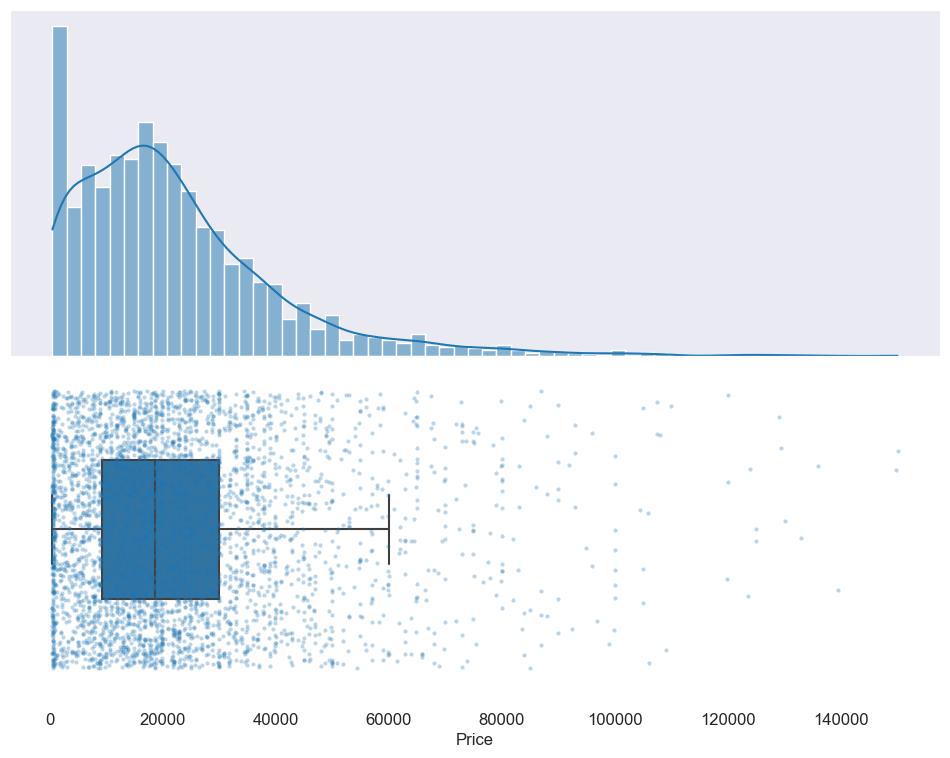

In [9]:
df = df.reset_index(drop=True)
fig, axs = plt.subplots(nrows=2)

sns.histplot(
    df["Price"],
    kde=True,
    ax=axs[0]
)

sns.stripplot(
    df["Price"], 
    orient='h',
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    df["Price"],
    orient='h',
    width=0.4, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(df["Price"]) * 0.05
xmin = np.min(df["Price"]) - spacer
xmax = np.max(df["Price"]) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].set_facecolor('white')

In [10]:
df.loc[df.Price<1000]

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
128,Porsche Cayenne 4.8 GTS | Sport chrono | Leder...,ROS finance,626,Veenendaal,2012,162865,Benzine,Automaat,Utrecht
129,Audi Q5 55 TFSI e 367PK 20INCH 3X S-LINE LUCHT...,ROS finance,879,Veenendaal,2020,32765,Overige brandstoffen,Automaat,Utrecht
137,Mercedes-Benz A-Klasse 200 *AMG EDITION 1* Pan...,ROS finance,621,Veenendaal,2018,39945,Benzine,Automaat,Utrecht
153,Nissan Almera 2.2 Di Luxury airco 4drs 2000 blauw,HSV Auto's,999,Vaassen,2000,250000,Diesel,Handgeschakeld,Gelderland
253,Peugeot 206 1.4 X-line 3D 2001 Blauw,Hofman,900,Rotterdam,2001,149000,Benzine,Handgeschakeld,Zuid-Holland
...,...,...,...,...,...,...,...,...,...
4064,Volkswagen Fox 1.2 Trendline,Autohandel Honing,850,Amersfoort,2006,220516,Benzine,Handgeschakeld,Utrecht
4069,Mercedes-Benz CLK-klasse Coupé 200 Sport,Autohandel Honing,995,Amersfoort,1997,353664,Benzine,Handgeschakeld,Utrecht
4104,Mercedes-Benz Sprinter | 319,Regeljelease.nl,763,Heel Nederland,2021,76857,Diesel,Automaat,In every province
4118,Mercedes-Benz Sprinter | 319 3.0 CDI V6 Aut. L2H2,Regeljelease.nl,796,Heel Nederland,2021,88534,Diesel,Automaat,In every province


We see there are many cars under the price of 1000. Even though we expect there to be some, it feels like there are too many.
Looking at the table above shows that many of these cars are leases. This can be seen by the fact that the seller name and title contain the word lease, and also by the fact that cars under 1000 should mostly be low value old cars, not a 2012 4.8 Porsche Cayenne :).

We can try to remove lease options by first of all looking at which titles and sellers contain the words lease, finance, etc.
We could also make an argument for a correlation between Year and price, and decide that cars built after a certain year should not be less than 1000 euros.


In [11]:
df = df[~df.Title.str.contains('lease|finance', case=False)]
df = df[~df.Seller.str.contains('lease|finance', case=False)]
df

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
0,Fiat Doblo Cargo 1.9 JTD Grijs Kenteken Bestel...,I Boumans,18500,Gennep,2005,199313,Diesel,Handgeschakeld,Limburg
1,Ford Ranger Open-laadbak 2.2TDCI 160PK Dubbele...,DUTCH Vans,22600,Barneveld,2017,107195,Diesel,Handgeschakeld,Gelderland
2,Aixam Roadline -2008- incl. 3 mnd garantie + o...,Garage Kaal & Buunk,6950,Beek,2008,47108,Diesel,Automaat,Limburg
3,Mercedes-Benz Sprinter 314CDI 143pk L2H2 Koelw...,Van der Wal Vans,32900,Langerak,2018,148939,Diesel,Handgeschakeld,Drenthe
4,Opel Corsa 1.2 Turbo Start/stop 100pk Aut 2021...,Adam,18500,Amsterdam,2021,26200,Benzine,Automaat,Noord-Holland
...,...,...,...,...,...,...,...,...,...
4125,Mercedes 519 DOKA V 6 autotransporter/oprijwag...,Kegger Sp.z o.o.,89999,Heel Nederland,2022,50,Diesel,Automaat,In every province
4136,Volkswagen Crafter H1 L5 Diesel 2012 Groen,Dutchvans.com,14600,Barneveld,2012,183398,Diesel,Handgeschakeld,Gelderland
4137,Ford Transit Kipper 2.0TDCI 3-Zijdige Kipper |...,DUTCH Vans,16700,Barneveld,2016,95864,Diesel,Handgeschakeld,Gelderland
4138,Mercedes-Benz Sprinter H1 L4 Diesel 2018 Wit,Dutchvans.com,19300,Barneveld,2018,226713,Diesel,Handgeschakeld,Gelderland


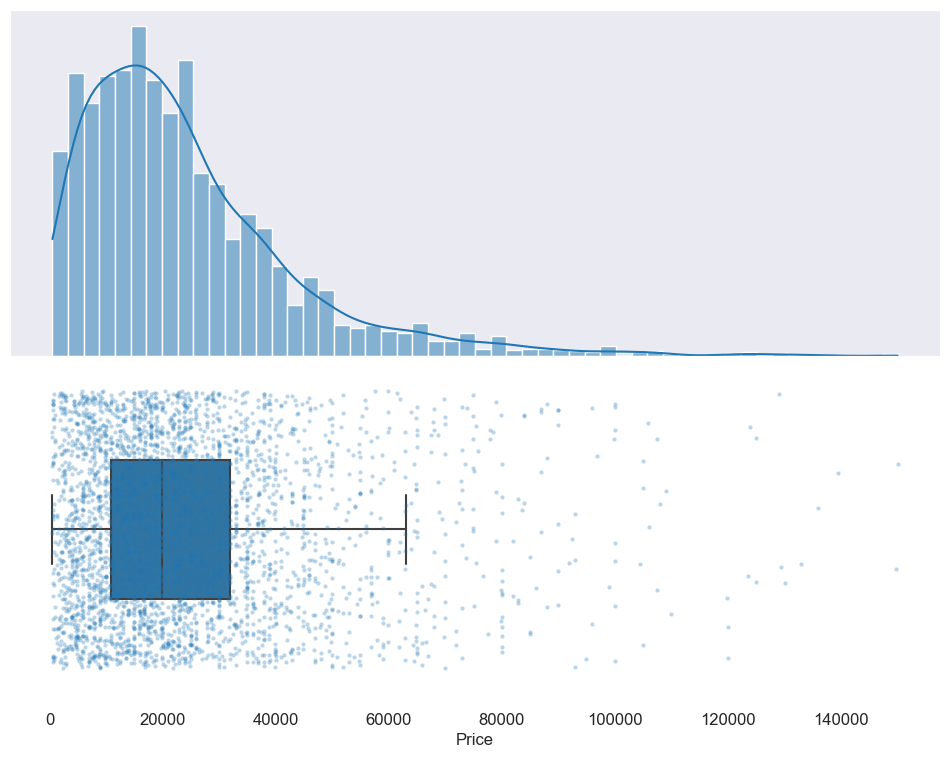

In [12]:
df = df.reset_index(drop=True)
fig, axs = plt.subplots(nrows=2)

sns.histplot(
    df["Price"],
    kde=True,
    ax=axs[0]
)

sns.stripplot(
    df["Price"],
    orient='h',
    jitter=0.4,
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    df["Price"],
    orient='h',
    width=0.4,
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(df["Price"]) * 0.05
xmin = np.min(df["Price"]) - spacer
xmax = np.max(df["Price"]) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].set_facecolor('white')

This distribution makes much more sense.
Let's also look at the correlation between the Year the car was built and the Price.

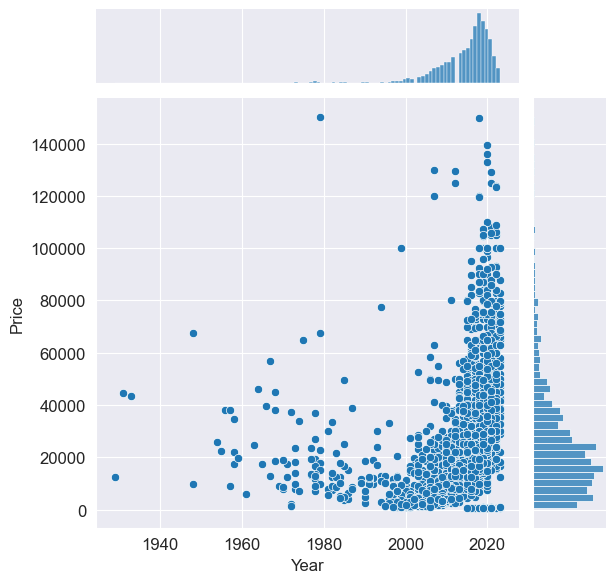

In [13]:
sns.jointplot(x='Year', y='Price', data=df)

We are removing cars before the year of 1990, as they cause much noise but are relatively sparse. They are noisy because some old cars have high value because of their old age, while othersare simply old and unreliable and therefore have the opposite effect.

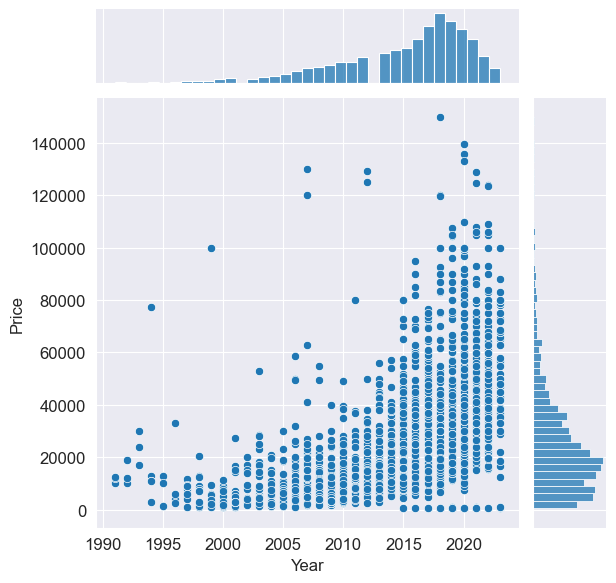

In [14]:
df = df[df.Year>1990]
sns.jointplot(x='Year', y='Price', data=df)

In this plot we can see that, from from 2005 to 2015, no cars are in the lowest price bracket. However, from 2015 to current, that bracket is populated again. Let's try removing all cars that are built from 2014 onwards, but are listed at a price lower than 1000 euros.

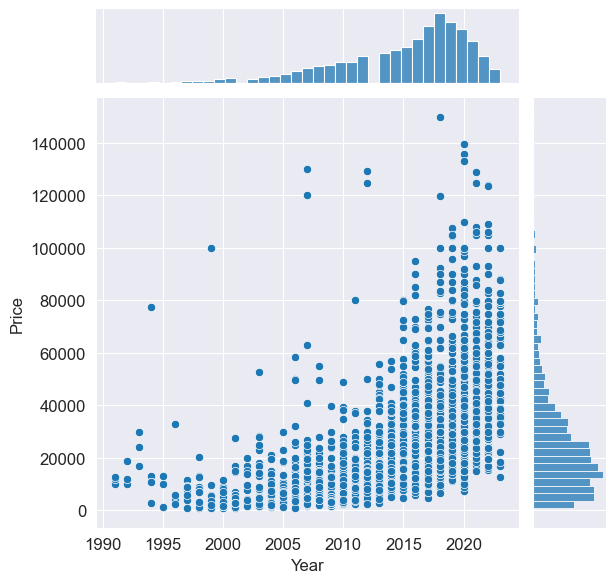

In [15]:
df = df[(df.Year<=2013) | (df.Price>=1000)]
sns.jointplot(x='Year', y='Price', data=df)

In [16]:
df[(df.Year<2000) & (df.Price>=60000)]

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
1497,Porsche 911 Cabrio 3.6 | Carrera | Automaat (b...,Selles Autos Kamperzeedijk B.V.,77500,Genemuiden,1994,209810,Benzine,Automaat,Overijssel
2268,Ferrari 360 3.6 V8 Modena / Handgeschakelde 6 ...,EAF Auto's,99950,Voorschoten,1999,60246,Benzine,Handgeschakeld,Zuid-Holland


In [17]:
df[df.Price>=115000]

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,province
501,Porsche CAYENNE 4.0 Turbo Akrapovic XPEL (PPF),Automotive Experience,119950,Vianen,2018,91500,Benzine,Automaat,Noord-Brabant
671,Ferrari FF 6.3 V12 HELE,Autozaak Rivo,124950,Stadskanaal,2012,74658,Benzine,Automaat,Groningen
676,Ferrari California 4.3 V8 460PK F1 Keramisch C...,Autoplein Nijkerk,129400,Nijkerk,2012,16400,Benzine,Automaat,Gelderland
785,BMW X7 xDrive 40d 340 pk M Sportpakket Sky Lou...,Lenferink Auto's B.V.,124900,Almelo,2021,46297,Diesel,Automaat,Overijssel
908,BMW 4 Serie Coupé M4 Competition Race Track *M...,Horse Power Factory,128950,Winterswijk,2021,14174,Benzine,Automaat,Gelderland
1194,BMW X7 M M50D 400PK 7Pers High Executive Bower...,Bedrijfswagen centrum Leeuwarden,135850,Leeuwarden,2020,59500,Diesel,Automaat,Fryslân
1553,BMW 3 Serie M3 xDrive Competition SPORTSTOELEN...,Ros Automotive,123950,Veenendaal,2022,12342,Benzine,Automaat,Utrecht
1555,Mercedes-Benz AMG GT 4.0 C | 50 YEARS EDITION ...,Ros Automotive,149750,Veenendaal,2018,10123,Benzine,Automaat,Utrecht
1986,Land Rover Range Rover Sport 5.0 V8 Supercharg...,JD,119750,Veenendaal,2018,97580,Benzine,Automaat,Utrecht
2103,Mercedes-Benz S400D/ 4Matic/Burmeister4D/ FULL...,Godfried,123500,Almelo,2022,10000,Diesel,Automaat,Overijssel


In [18]:
df = df[(df.Year>=2000) | (df.Price<=60000)]

In [19]:
df = remove_outliers(df, 'Price', upper=115000)

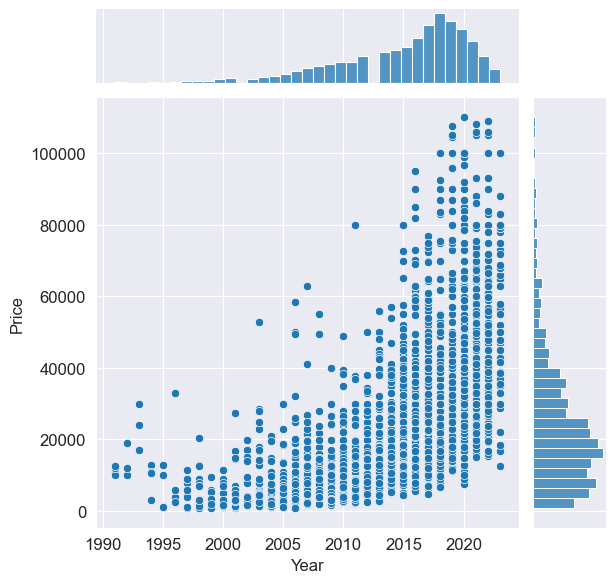

In [20]:
sns.jointplot(x='Year', y='Price', data=df)

<Axes: xlabel='Price', ylabel='Ran'>

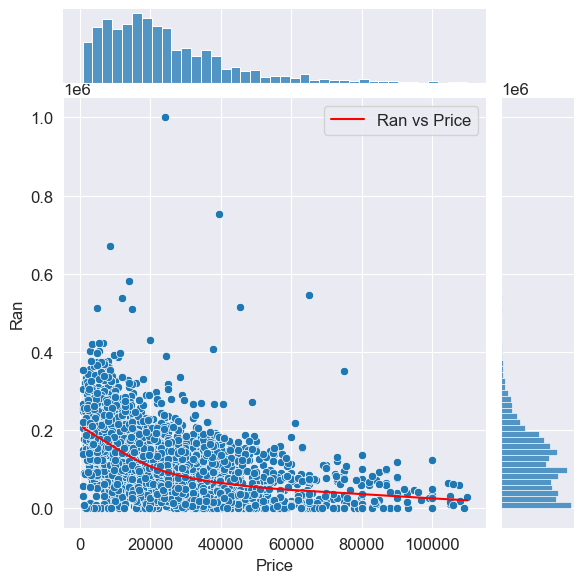

In [21]:
sns.jointplot(x='Price', y='Ran', data=df)
xobs = df.Price
yobs = df.Ran
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x=xobs, y=ysmooth, label='Ran vs Price', color='red')

In [67]:
manufacturers = pd.read_csv('manufacturers.csv')
manufacturers.make = manufacturers.make.str.lower()
manufacturers

,make
0,alfa romeo
1,aston martin
2,audi
3,bmw
4,chevrolet
...,...
60,saab
61,ssanyong
62,daihatsu
63,hummer


In [70]:
df.Title = df.Title.str.lower()
df.Title = df.Title.str.replace('vw', 'volkswagen')

In [79]:
def extract_make(title):
    for make in manufacturers['make']:
        if make in title:
            return make
    return None
df['Make'] = df['Title'].apply(extract_make)
df['Province'] = df.province
df.drop('province',axis=1)
df = df[['Make', 'Price', 'Year', 'Ran', 'Engine Type', 'Transmission', 'Location', 'Province', 'Seller', 'Title']]

AttributeError: 'DataFrame' object has no attribute 'province'

In [80]:
df

,Make,Price,Year,Ran,Engine Type,Transmission,Location,Province,Seller,Title
0,fiat,18500,2005,199313,Diesel,Handgeschakeld,Gennep,Limburg,I Boumans,fiat doblo cargo 1.9 jtd grijs kenteken bestel...
1,ford,22600,2017,107195,Diesel,Handgeschakeld,Barneveld,Gelderland,DUTCH Vans,ford ranger open-laadbak 2.2tdci 160pk dubbele...
2,aixam,6950,2008,47108,Diesel,Automaat,Beek,Limburg,Garage Kaal & Buunk,aixam roadline -2008- incl. 3 mnd garantie + o...
3,mercedes,32900,2018,148939,Diesel,Handgeschakeld,Langerak,Drenthe,Van der Wal Vans,mercedes-benz sprinter 314cdi 143pk l2h2 koelw...
4,opel,18500,2021,26200,Benzine,Automaat,Amsterdam,Noord-Holland,Adam,opel corsa 1.2 turbo start/stop 100pk aut 2021...
...,...,...,...,...,...,...,...,...,...,...
3508,mercedes,89999,2022,50,Diesel,Automaat,Heel Nederland,In every province,Kegger Sp.z o.o.,mercedes 519 doka v 6 autotransporter/oprijwag...
3509,volkswagen,14600,2012,183398,Diesel,Handgeschakeld,Barneveld,Gelderland,Dutchvans.com,volkswagen crafter h1 l5 diesel 2012 groen
3510,ford,16700,2016,95864,Diesel,Handgeschakeld,Barneveld,Gelderland,DUTCH Vans,ford transit kipper 2.0tdci 3-zijdige kipper |...
3511,mercedes,19300,2018,226713,Diesel,Handgeschakeld,Barneveld,Gelderland,Dutchvans.com,mercedes-benz sprinter h1 l4 diesel 2018 wit
